# Module 5: Pymaceuticals 

## Observations and Insights

#1 Total number of mice in the study was 249, with one duplicate test data set for Mouse ID g989.  Study group was almost evenly proportioned by gender: 50.96% male and 49.04% female. 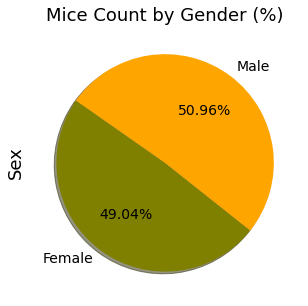

#2 Capomulin and Ramicane were the most successful drug regimens in reducing the size of the tumors in this 45 days study. 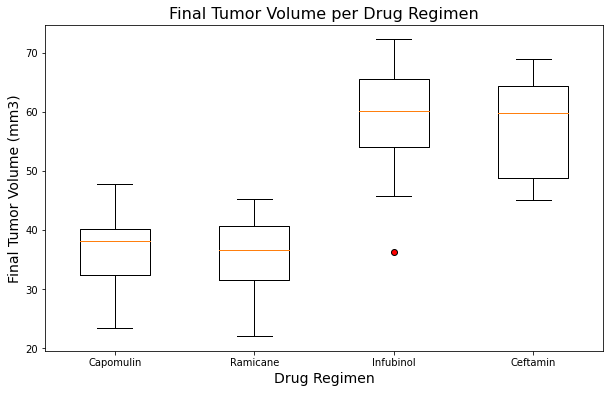

#3 The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, meaning that the average tumor volume increased when the mouse weight increased. 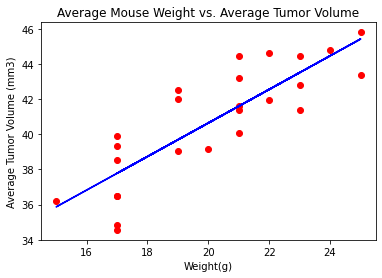

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combinedData = pd.merge(mouse_metadata, study_results, how = "outer")

# Display the data table for preview
combinedData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
len(combinedData["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateMice = combinedData.loc[combinedData.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicateMice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicateMouseDF = combinedData[combinedData["Mouse ID"] == "g989"]  
duplicateMouseDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanMiceDF = combinedData[combinedData['Mouse ID'].isin(duplicateMice)==False]
cleanMiceDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(cleanMiceDF["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#test
cleanMiceDF.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drugRegimens = cleanMiceDF.groupby("Drug Regimen")

tumorMean = round(drugRegimens["Tumor Volume (mm3)"].mean(),4)
tumorMedian = round(drugRegimens["Tumor Volume (mm3)"].median(),4)
tumorVar = round(drugRegimens["Tumor Volume (mm3)"].var(),4)
tumorStd = round(drugRegimens["Tumor Volume (mm3)"].std(),4)
tumorSEM = round(drugRegimens["Tumor Volume (mm3)"].sem(),4)

tumorVolumeDF = pd.DataFrame({
                "Mean" : tumorMean, 
                "Median" : tumorMedian, 
                "Variance" : tumorVar, 
                "Standard Deviation" : tumorStd, 
                "SEM" : tumorSEM
})

# Assemble the resulting series into a single summary dataframe.

tumorVolumeDF

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.3209,50.4463,43.8520,6.6221,0.5443
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drugRegimens2 = cleanMiceDF.groupby("Drug Regimen")
tumorVolume2 = drugRegimens2.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]

tumorVolume2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

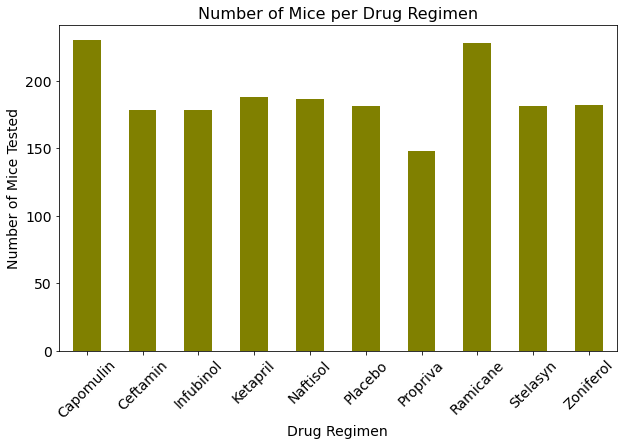

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_grouped = cleanMiceDF.groupby(["Drug Regimen"])
mice_per_regimen = mice_grouped["Mouse ID"].count()

bar_plot = mice_per_regimen.plot(kind ="bar", color='olive', fontsize = 14, rot=45, figsize = (10,6))
bar_plot.set_xlabel("Drug Regimen", fontsize = 14)
bar_plot.set_ylabel("Number of Mice Tested", fontsize = 14)
bar_plot.set_title("Number of Mice per Drug Regimen", fontsize = 16)


plt.show()


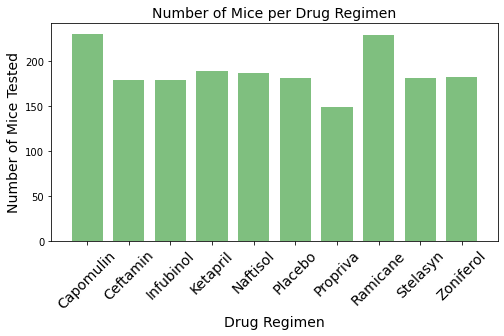

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(mice_per_regimen))
tick_location = [drug for drug in x_axis]

plt.figure(figsize = (8,4))

plt.bar(x_axis, mice_per_regimen, color = "green", alpha = .5, width = .75)
plt.xticks(tick_location, mice_per_regimen.index, rotation = 45, fontsize = 14)
plt.xlabel("Drug Regimen", fontsize = 14)
plt.ylabel("Number of Mice Tested", fontsize = 14)
plt.title("Number of Mice per Drug Regimen", fontsize = 14)


plt.show()


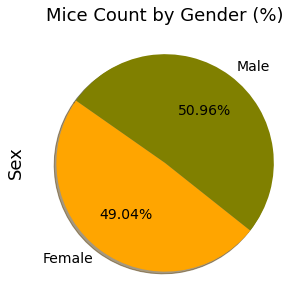

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

groupbyGender = cleanMiceDF.groupby(["Sex"])

mouseCount = groupbyGender["Mouse ID"].count()
#mouseCount 
pieByGender = mouseCount.plot.pie(y = mouseCount, colors = {"olive", "orange"},
                                autopct = "%1.2f%%", fontsize = 14, startangle=145, figsize = (5,5), shadow=True)
pieByGender.set_title("Mice Count by Gender (%)", fontsize = 18)
pieByGender.set_ylabel("Sex", fontsize = 18)

plt.show()


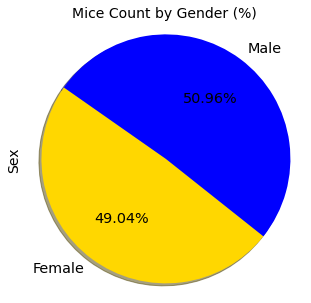

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_labels = mouseCount.index
colors = ["gold", "blue"]

plt.figure(figsize=(5,5))
plt.pie(mouseCount, labels = pie_labels, colors=colors, autopct="%1.2f%%", textprops={'size': 'x-large'}, 
                            startangle=145, shadow=True)
plt.title("Mice Count by Gender (%)", fontsize = 14)
plt.ylabel("Sex", fontsize = 14)
plt.axis("equal")

plt.show()


## Quartiles, Outliers and Boxplots
Calculate Quartiles, Find Outliers, and Create a Box Plot

In [15]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.
#Then, calculate the quartiles and IQR, and determine if there are any potential outliers across all four treatment regimens. 
    
#Use the following substeps:

# 1 Create a grouped DataFrame that shows the last (greatest) time point for each mouse. 
maxTimepoint = cleanMiceDF.groupby(["Mouse ID"])["Timepoint"].max()
maxTimepoint.head

# 2 Merge this grouped DataFrame with the original cleaned DataFrame.
CombinedDF = pd.merge(maxTimepoint , cleanMiceDF, on=(["Mouse ID","Timepoint"]))
CombinedDF


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list  = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = CombinedDF.loc[CombinedDF["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    print(f"{drug}'s potential outliers are: {outliers}")

Capomulin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


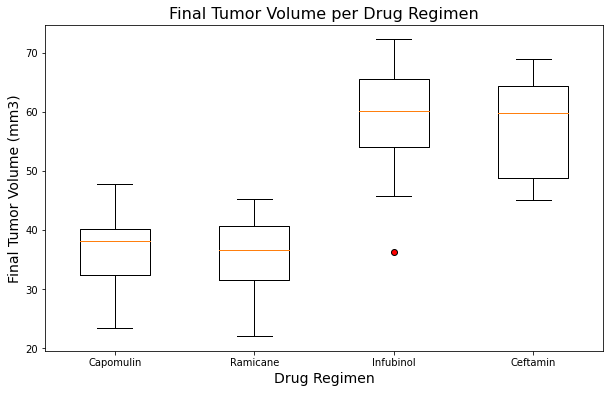

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots(figsize=(10,6))
red_dot = dict(markerfacecolor='r', marker='o')
ax1.set_title("Final Tumor Volume per Drug Regimen",fontsize =16)
ax1.set_ylabel("Final Tumor Volume (mm3)",fontsize = 14)
ax1.set_xlabel("Drug Regimen",fontsize = 14)
ax1.boxplot(tumor_vol_list, labels = treatment_list, widths = .5, flierprops=red_dot)

plt.show()


## Line Plots
Select a mouse that was treated with Capomulin, and generate a line plot of tumor volume versus time point for that mouse.


In [18]:
#  1 find all mice treated by Capomulin
CapomulinDF = cleanMiceDF.loc[cleanMiceDF["Drug Regimen"] == "Capomulin",:]
CapomulinDF.head(25)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [19]:
# 2 select a mouse treated by Capomulin ---- selected x401
CapomulinMouseDF = CapomulinDF.loc[CapomulinDF["Mouse ID"] == "x401",:]
CapomulinMouseDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0


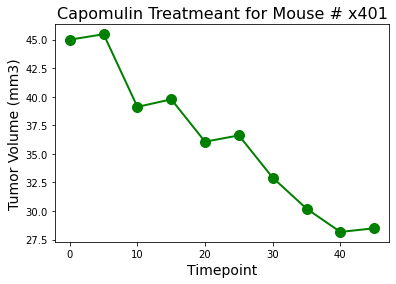

In [20]:
# 3 generate a line plot

x_axis = CapomulinMouseDF["Timepoint"]
tumorVolume = CapomulinMouseDF["Tumor Volume (mm3)"]

plt.title("Capomulin Treatmeant for Mouse # x401",fontsize = 16)
plt.plot(x_axis, tumorVolume, linewidth=2, markersize=10, marker="o", color="green")
plt.xlabel("Timepoint",fontsize =14)
plt.ylabel("Tumor Volume (mm3)",fontsize =14)

plt.show()

# Scatter Plots
Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.

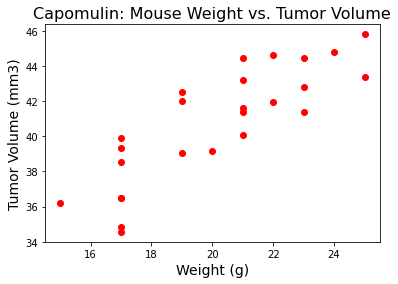

In [21]:
CapomulinAvg = CapomulinDF.groupby(["Mouse ID"]).mean()
avgWeight = CapomulinAvg["Weight (g)"]
avgTumorVol = CapomulinAvg["Tumor Volume (mm3)"]

plt.scatter(avgWeight, avgTumorVol, color="red")
plt.title("Capomulin: Mouse Weight vs. Tumor Volume",fontsize = 16)
plt.xlabel("Weight (g)",fontsize =14)
plt.ylabel("Tumor Volume (mm3)",fontsize =14)


plt.show()

## Correlation and Regression

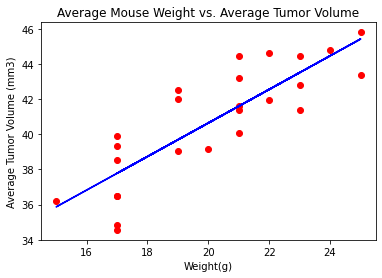

The correlation between mouse weight and the average tumor volume is 0.84.


In [22]:
#Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment.
#Plot the linear regression model on top of the previous scatter plot.

slope, intercept, rValue, pValue, stdErr = st.linregress(avgWeight, avgTumorVol)

regress_value = avgWeight * slope  + intercept
plt.scatter(avgWeight, avgTumorVol, facecolor = "red")
plt.plot(avgWeight, regress_value, color = "blue")

plt.title("Average Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {str(round(rValue,2))}.")
